In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
movies=pd.read_csv("/home/dhananjaya/adi/DS/movie_recommendation/movies.csv")
ratings=pd.read_csv("/home/dhananjaya/adi/DS/movie_recommendation/ratings.csv")

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


here iam building two types of recommender system 
1)popularity based recommendation system 
2)collabarative recommendation system

# popularity based recommendatio system

In [5]:
#merging both ratings and movies data based on movieid
movies_data=pd.merge(ratings,movies,on='movieId')
movies_data.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19,1,4.0,965705637,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21,1,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27,1,3.0,962685262,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31,1,5.0,850466616,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [6]:
#creating new dataframe for analysis
popular=pd.DataFrame(movies_data.groupby('title')['rating'].mean())
popular.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [7]:
#creating another column
popular['total_numbers_of_rating']=pd.DataFrame(movies_data.groupby('title')['rating'].count())
popular.head()

,rating,total_numbers_of_rating
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


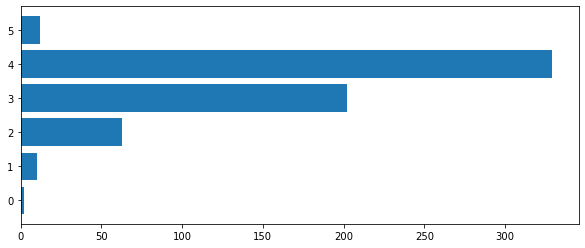

In [8]:
#ploting the ratings with number of movies
plt.figure(figsize=(10,4))
graph=plt.barh(popular['rating'].round(),popular['total_numbers_of_rating'])
plt.show()

In [10]:
# checkingnthe popular high rating movies
movies_data.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Sorority House Massacre (1986)                   5.0
Bill Hicks: Revelations (1993)                   5.0
My Man Godfrey (1957)                            5.0
Hellbenders (2012)                               5.0
In the blue sea, in the white foam. (1984)       5.0
Name: rating, dtype: float64

# Collaborative Filtering (user-user)

In [19]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

In [20]:
#loading built in dataset
data=Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /home/dhananjaya/.surprise_data/ml-100k


In [22]:
train_set,test_set=train_test_split(data,test_size=0.20)

In [27]:
model=KNNWithMeans(k=50,sim_options={'name':'pearson_baseline','user_based':True})
model.fit(train_set)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [28]:
#speicific prediction
user_id=str(128) #RAW USER ID
item_id=str(258) #RAW ITEM ID
model.predict(user_id,item_id,verbose=True)

user: 128        item: 258        r_ui = None   est = 3.15   {'actual_k': 50, 'was_impossible': False}


Prediction(uid='128', iid='258', r_ui=None, est=3.147408169705775, details={'actual_k': 50, 'was_impossible': False})

In [30]:
test_pred=model.test(test_set)
test_pred[1:10]

[Prediction(uid='394', iid='101', r_ui=4.0, est=4.0421241644013435, details={'actual_k': 32, 'was_impossible': False}),
 Prediction(uid='429', iid='737', r_ui=4.0, est=2.8578429517984123, details={'actual_k': 26, 'was_impossible': False}),
 Prediction(uid='343', iid='382', r_ui=3.0, est=4.143017089767009, details={'actual_k': 49, 'was_impossible': False}),
 Prediction(uid='915', iid='328', r_ui=2.0, est=3.257058080888061, details={'actual_k': 50, 'was_impossible': False}),
 Prediction(uid='6', iid='501', r_ui=5.0, est=3.629259125970223, details={'actual_k': 43, 'was_impossible': False}),
 Prediction(uid='863', iid='1296', r_ui=3.0, est=2.951497128443842, details={'actual_k': 10, 'was_impossible': False}),
 Prediction(uid='72', iid='51', r_ui=4.0, est=3.6823226402017024, details={'actual_k': 30, 'was_impossible': False}),
 Prediction(uid='405', iid='421', r_ui=1.0, est=2.0094577089664183, details={'actual_k': 38, 'was_impossible': False}),
 Prediction(uid='500', iid='1111', r_ui=4.0, es